In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
countries = {'AUT': 'Austria', 'JPN': 'Japan', 'VNM': 'Vietnam', 'IND': 'India', 'SRB': 'Serbia', 'DEU': 'Germany', 'CHE': 'Switzerland'}

# Movement Dataset Cleaning

Note: This dataset is too large for github. When running this notebook, either exclude it or download and convert manually from https://data.humdata.org/dataset/c3429f0e-651b-4788-bb2f-4adbf222c90e/resource/3d77ce5c-ab6d-4864-b8a2-c8bafffac4f3/download/movement-range-data-2020-03-01-2020-12-31.zip

In [3]:
movement = pd.read_csv('covid_data/movement.csv')

/tmp/ipykernel_31537/733057425.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movement = pd.read_csv('covid_data/movement.csv')


In [4]:
movement = movement.drop(columns=['polygon_name','polygon_id','baseline_name','baseline_type'])

In [5]:
movement['country'].unique()

array(['AGO', 'ALB', 'ARE', 'ARG', 'ASM', 'AUS', 'AUT', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CIV', 'CMR', 'COD',
       'COG', 'COL', 'CRI', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'FRO', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB',
       'GNQ', 'GRC', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRQ', 'ISL', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBN',
       'LBR', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MDA', 'MDG',
       'MEX', 'MKD', 'MLI', 'MLT', 'MNG', 'MOZ', 'MRT', 'MTQ', 'MUS',
       'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'NZL', 'OMN', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT',
       'PRY', 'QAT', 'REU', 'ROU', 'RWA', 'SAU', 'SEN', 'SLE', 'SLV',
       'SRB', 'STP',

In [6]:
df_movement = movement[movement['country'].isin(countries.keys())]

In [7]:
df_movement[df_movement.ds == '2020-03-01']

,ds,country,polygon_source,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users
254825,2020-03-01,AUT,GADM,0.00110,0.30054
255131,2020-03-01,AUT,GADM,-0.12246,0.31060
255437,2020-03-01,AUT,GADM,0.01888,0.29186
255743,2020-03-01,AUT,GADM,-0.00429,0.28384
256049,2020-03-01,AUT,GADM,0.02744,0.25508
...,...,...,...,...,...
5204472,2020-03-01,VNM,GADM,-0.08967,0.24307
5204778,2020-03-01,VNM,GADM,-0.10630,0.24012
5205084,2020-03-01,VNM,GADM,-0.12211,0.24585
5205390,2020-03-01,VNM,GADM,-0.10207,0.20601


Get mean across all regions in the respective countries.

In [8]:
df_movement = df_movement.groupby(['country', 'ds']).mean().reset_index()

In [9]:
df_movement

,country,ds,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users
0,AUT,2020-03-01,-0.006207,0.277241
1,AUT,2020-03-02,0.073162,0.137646
2,AUT,2020-03-03,0.039098,0.153732
3,AUT,2020-03-04,0.050410,0.141586
4,AUT,2020-03-05,0.023352,0.139286
...,...,...,...,...
2137,VNM,2020-12-27,0.098687,0.223919
2138,VNM,2020-12-28,0.135218,0.190406
2139,VNM,2020-12-29,0.150663,0.192776
2140,VNM,2020-12-30,0.108705,0.200399


In [10]:
df_movement.ds = pd.to_datetime(df_movement.ds)

Add np.nan values for dates before March 2020 in order to add it to the other datasets.

In [11]:
for country in countries.keys():
    df_temp = df_movement[df_movement.country == country].set_index('ds').reindex(pd.date_range('01-01-2020', '2020-12-31', freq='D')).reset_index()
    df_temp.country.fillna(value=country, inplace=True)
    df_temp = df_temp.rename(columns={'index':'ds'})
    
    df_movement = pd.concat([df_movement,df_temp]).drop_duplicates().reset_index(drop=True)

In [12]:
df_movement.sort_values(by='ds', inplace=True)
df_movement

,country,ds,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users
2322,IND,2020-01-01,NaN,NaN
2442,DEU,2020-01-01,NaN,NaN
2502,CHE,2020-01-01,NaN,NaN
2202,JPN,2020-01-01,NaN,NaN
2142,AUT,2020-01-01,NaN,NaN
...,...,...,...,...
305,AUT,2020-12-31,-0.343366,0.270152
2141,VNM,2020-12-31,0.223923,0.189882
1835,SRB,2020-12-31,-0.063242,0.208936
611,CHE,2020-12-31,-0.214519,0.240731


# Stay at Home Requirements Dataset

In [13]:
stay = pd.read_csv('covid_data/stay-at-home-covid_oxford.csv')

In [14]:
stay.head()

,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [15]:
df_stay = stay[stay['Code'].isin(countries.keys())]
df_stay.Day = pd.to_datetime(df_stay.Day)

/tmp/ipykernel_31537/22741122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay.Day = pd.to_datetime(df_stay.Day)


In [16]:
df_stay

,Entity,Code,Day,stay_home_requirements
8392,Austria,AUT,2020-01-01,0
8393,Austria,AUT,2020-01-02,0
8394,Austria,AUT,2020-01-03,0
8395,Austria,AUT,2020-01-04,0
8396,Austria,AUT,2020-01-05,0
...,...,...,...,...
190571,Vietnam,VNM,2022-11-16,0
190572,Vietnam,VNM,2022-11-17,0
190573,Vietnam,VNM,2022-11-18,0
190574,Vietnam,VNM,2022-11-19,0


In [17]:
# df_stay.to_csv('output_data/filtered_stay.csv')

# After Lockdown Start Dataset
This Dataset was manually created from the Stay Home Dataset and has the value 1 if the date is >= the first day where the value of the stay home requirements was not 0. It has the value 0 if the date is before that day.
This dataset aims to reduce noise through a slow descent in page views after peaks, whereas the official stay home requirements were already classified as 0.

In [18]:
df_after_lockdown_start = pd.read_csv('covid_data/after_lockdown_start.csv', index_col=0)
df_after_lockdown_start

,Entity,Code,Day,after_lockdown_start
8392,Austria,AUT,2020-01-01,0
8393,Austria,AUT,2020-01-02,0
8394,Austria,AUT,2020-01-03,0
8395,Austria,AUT,2020-01-04,0
8396,Austria,AUT,2020-01-05,0
...,...,...,...,...
190571,Vietnam,VNM,2022-11-16,1
190572,Vietnam,VNM,2022-11-17,1
190573,Vietnam,VNM,2022-11-18,1
190574,Vietnam,VNM,2022-11-19,1


In [19]:
df_after_lockdown_start.Day = pd.to_datetime(df_after_lockdown_start.Day)

# Stringency Index Dataset

In [20]:
df_stringency = pd.read_csv('covid_data/owid-covid-data.csv')
df_stringency

,DATE,AUT,DEU,IND,JPN,SRB,CHE,VNM
0,1/1/2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,1/2/2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/3/2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/4/2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,1/5/2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
360,6/27/2020,52.31,63.43,87.5,25.93,27.78,35.19,55.56
361,6/28/2020,52.31,63.43,87.5,25.93,27.78,35.19,55.56
362,6/29/2020,52.31,63.43,87.5,25.93,25.93,35.19,55.56
363,6/30/2020,52.31,63.43,87.5,25.93,25.93,35.19,55.56


In [21]:
df_stringency.DATE = pd.to_datetime(df_stringency.DATE)

In [22]:
df_stringency = df_stringency.melt(id_vars=["DATE"], 
        var_name="country", 
        value_name="stringency_index")

# Combine the Datasets

In [23]:
combined_df = pd.merge(df_movement, df_stay,  how='left', left_on=['ds','country'], right_on = ['Day','Code'])
combined_df = pd.merge(combined_df, df_after_lockdown_start,  how='left', left_on=['ds','country'], right_on = ['Day','Code'])
combined_df = pd.merge(combined_df, df_stringency,  how='left', left_on=['ds','country'], right_on = ['DATE','country'])


In [24]:
combined_df = combined_df.drop(columns=['Day_x', 'Code_x', 'Entity_x', 'Day_y', 'Code_y', 'Entity_y', 'DATE'])
combined_df = combined_df.rename(columns={'ds': 'date'})

Add Language for each country

In [25]:
combined_df['language'] = ''
combined_df['language'] = np.where(combined_df['country'] == 'VNM', 'Vietnamese', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'SRB', 'Serbian', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'IND', 'Tamil', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'JPN', 'Japanese', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'AUT', 'German', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'CHE', 'German', combined_df['language'])
combined_df['language'] = np.where(combined_df['country'] == 'DEU', 'German', combined_df['language'])
combined_df['language'].unique()

array(['Tamil', 'German', 'Japanese', 'Vietnamese', 'Serbian'],
      dtype=object)

In [26]:
combined_df

,country,date,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,stay_home_requirements,after_lockdown_start,stringency_index,language
0,IND,2020-01-01,NaN,NaN,0,0,0.0,Tamil
1,DEU,2020-01-01,NaN,NaN,0,0,0.0,German
2,CHE,2020-01-01,NaN,NaN,0,0,0.0,German
3,JPN,2020-01-01,NaN,NaN,0,0,0.0,Japanese
4,AUT,2020-01-01,NaN,NaN,0,0,0.0,German
...,...,...,...,...,...,...,...,...
2557,AUT,2020-12-31,-0.343366,0.270152,2,1,NaN,German
2558,VNM,2020-12-31,0.223923,0.189882,2,1,NaN,Vietnamese
2559,SRB,2020-12-31,-0.063242,0.208936,1,1,NaN,Serbian
2560,CHE,2020-12-31,-0.214519,0.240731,1,1,NaN,German


In [27]:
combined_df.to_csv('output_data/lockdown_severity.csv')

Correlation between the different indicators of lockdown

<AxesSubplot: >

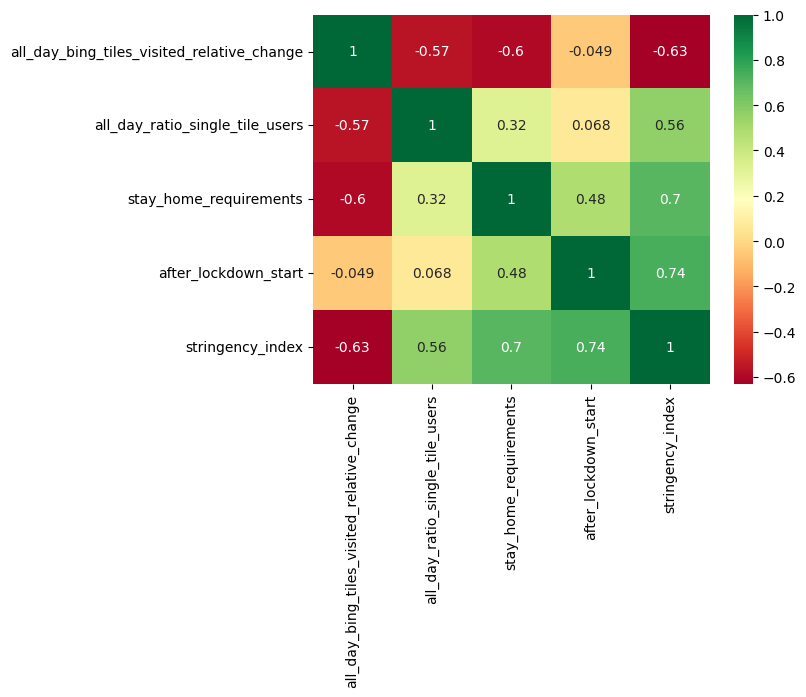

In [28]:
sns.heatmap(combined_df.corr(), annot=True, cmap='RdYlGn')

Some correlation between visited tiles and stay_home_requirements. all_day_bing_tiles_visited_relative_change is more telling than all_day_ratio_single_tile_users.
Most striking correlations between stringeny_index and stay_home_requirements, as well as after_lockdown_start.